In [ ]:
# IMPORTING NECESSARY LIBRARIES
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

#IMPORTING THE TRANSFER LEARNING MODEL
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


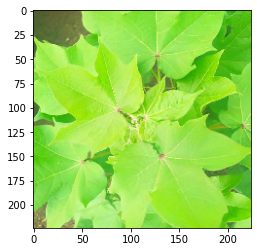

In [ ]:
# SAMPLE IMAGE FROM DATASET
from keras.preprocessing import image
import numpy as np
img = image.load_img('/content/drive/My Drive/Deep Learning/cotton_disease/train/fresh cotton plant/dsd (145)_iaip.jpg', target_size=(224,224))
plt.imshow(img)

In [ ]:
# SETTING IMAGE SIZE
imgSize = [224, 224]

In [ ]:
# LOADING TRANSFER LEARNING MODEL
resnet101v2=tf.keras.applications.ResNet101V2(input_shape=imgSize + [3], weights='imagenet', include_top=False)

171319296/171317808 [==============================] - 5s 0us/step


In [ ]:
# TO USE THE PRE-TRAINED WEIGHTS
for layer in resnet101v2.layers:
    layer.trainable = False

In [ ]:
# USED FOR GETTING OUTPUT CLASSES
classes = glob('/content/drive/My Drive/Deep Learning/cotton_disease/train/*')

In [ ]:
# OUTPUT OF RESNET MODEL
out1 = Flatten()(resnet101v2.output)
prediction = Dense(len(classes), activation='softmax')(out1)

# cCREATE A MODEL OBJECT
model = Model(inputs=resnet101v2.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# COMPILING MODEL
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# IMAGE AUGMENTATION USING IMAGEDATAGENERATO
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Deep Learning/cotton_disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Deep Learning/cotton_disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [ ]:
# CHECKING THE MODEL LAYERS
modelLayers = [ layer.name for layer in model.layers]
print('Layer Name : ',modelLayers)

Layer Name :  ['input_1', 'conv1_pad', 'conv1_conv', 'pool1_pad', 'pool1_pool', 'conv2_block1_preact_bn', 'conv2_block1_preact_relu', 'conv2_block1_1_conv', 'conv2_block1_1_bn', 'conv2_block1_1_relu', 'conv2_block1_2_pad', 'conv2_block1_2_conv', 'conv2_block1_2_bn', 'conv2_block1_2_relu', 'conv2_block1_0_conv', 'conv2_block1_3_conv', 'conv2_block1_out', 'conv2_block2_preact_bn', 'conv2_block2_preact_relu', 'conv2_block2_1_conv', 'conv2_block2_1_bn', 'conv2_block2_1_relu', 'conv2_block2_2_pad', 'conv2_block2_2_conv', 'conv2_block2_2_bn', 'conv2_block2_2_relu', 'conv2_block2_3_conv', 'conv2_block2_out', 'conv2_block3_preact_bn', 'conv2_block3_preact_relu', 'conv2_block3_1_conv', 'conv2_block3_1_bn', 'conv2_block3_1_relu', 'conv2_block3_2_pad', 'conv2_block3_2_conv', 'conv2_block3_2_bn', 'conv2_block3_2_relu', 'max_pooling2d', 'conv2_block3_3_conv', 'conv2_block3_out', 'conv3_block1_preact_bn', 'conv3_block1_preact_relu', 'conv3_block1_1_conv', 'conv3_block1_1_bn', 'conv3_block1_1_relu', 

In [ ]:
img = image.load_img('/content/drive/My Drive/Deep Learning/cotton_disease/train/fresh cotton plant/dsd (145)_iaip.jpg', target_size=(224, 224))
img = image.img_to_array(img)
img = preprocess_input(img)
img = np.expand_dims(img, axis=0)

In [ ]:
# CHECKING THE CONVOLUTION OUTPUT
from keras.models import Model
convOutput = Model(inputs=model.input, outputs=model.get_layer('pool1_pad').output)
convFeatures = convOutput.predict(img) #conv1_conv

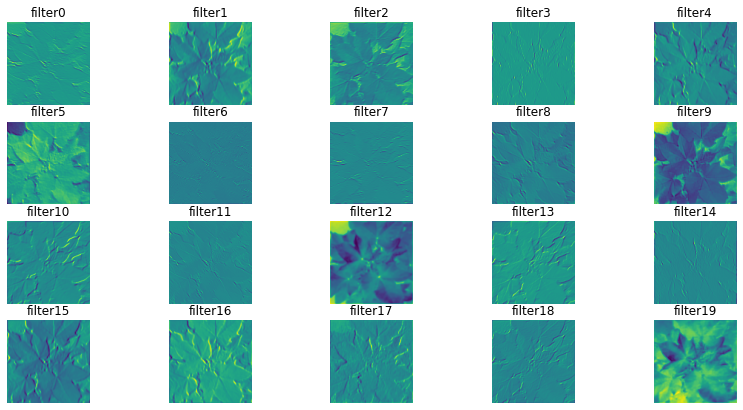

In [ ]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 5
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(convFeatures[0, :, :, i], cmap='viridis')
plt.show()

In [ ]:
# CHECKING THE POOLING OUTPUT
poolingOutput = Model(inputs=model.input,outputs=model.get_layer('pool1_pool').output)
poolingfeatures = poolingOutput.predict(img)

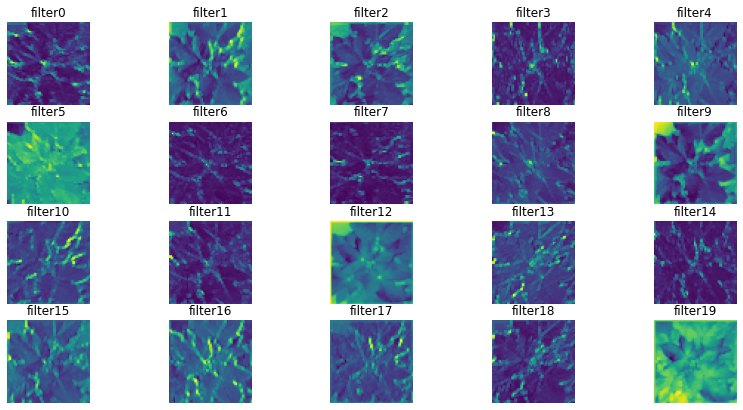

In [ ]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 5
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(poolingfeatures[0, :, :, i], cmap='viridis')
plt.show()

In [ ]:
# TRAINING THE MODEL
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  verbose=1,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 42s 606ms/step - loss: 2.3177 - accuracy: 0.7362 - val_loss: 0.4554 - val_accuracy: 0.9340
Epoch 2/20
61/61 [==============================] - 35s 571ms/step - loss: 0.5888 - accuracy: 0.9234 - val_loss: 0.3386 - val_accuracy: 0.9717
Epoch 3/20
61/61 [==============================] - 35s 570ms/step - loss: 0.4713 - accuracy: 0.9377 - val_loss: 0.3252 - val_accuracy: 0.9623
Epoch 4/20
61/61 [==============================] - 35s 571ms/step - loss: 0.4798 - accuracy: 0.9506 - val_loss: 0.7063 - val_accuracy: 0.9528
Epoch 5/20
61/61 [==============================] - 35s 567ms/step - loss: 0.7407 - accuracy: 0.9439 - val_loss: 0.2566 - val_accuracy: 0.9528
Epoch 6/20
61/61 [==============================] - 35s 569ms/step - loss: 0.3411 - accuracy: 0.9708 - val_loss: 0.1420 - val_accuracy: 0.9717
Epoch 7/20
61/61 [==============================] - 35s 569ms/step - loss: 0.3810 - accuracy: 0.9683 - val_loss: 0.2459 - val_accuracy: 0.9623

In [ ]:
# SAVING MODEL HISTORY
import pickle
with open('/content/drive/My Drive/Deep Learning/cotton_disease/histresnet101v2', 'wb') as f:
  pickle.dump(history.history, f)

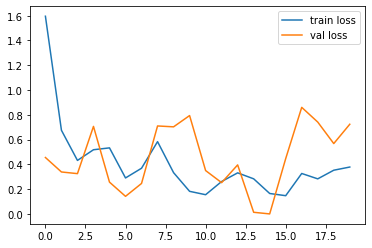

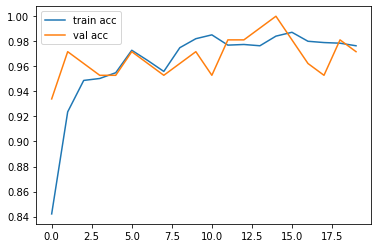

<Figure size 432x288 with 0 Axes>

In [ ]:
# PLOT LOSS
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# PLOT ACCURACY
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/researchPaperDL/model_resnet101v2.h5')

# PREDICTIONS

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [ ]:
model = load_model('/content/drive/MyDrive/researchPaperDL/model_resnet50.h5')

In [ ]:
imgPred = load_img('/content/drive/MyDrive/Deep Learning/cotton_disease/test/diseased cotton plant/dd (21)_iaip.jpg', target_size=(224,224))
imgPred = img_to_array(imgPred)
print(imgPred.shape)

(224, 224, 3)


In [ ]:
imgPred=np.expand_dims(imgPred,axis=0)
imgData=preprocess_input(imgPred)
imgData.shape

(1, 224, 224, 3)

In [ ]:
preds = model.predict(imgData)
print(preds)
preds = np.argmax(preds, axis=1)

[[9.9627328e-01 2.6042949e-11 1.1404243e-03 2.5863366e-03]]


In [ ]:
if preds==0:
  print("The leaf is diseased cotton leaf")
elif preds==1:
  print("The leaf is diseased cotton plant")
elif preds==2:
  print("The leaf is fresh cotton leaf")
else:
  print("The leaf is fresh cotton plant")

The leaf is diseased cotton plant
